## Final Project Submission

Please fill out:
* Student name: MOHAMED BASHIR ALI
* Student pace:part time 
* Scheduled project review date/time: 05/11/2023
* Instructor name: Samuel G


# Project Title: Exploratory Data Analysis for Microsoft's New Movie Studio Initiative

## Introduction
Provide an introduction to the business problem and the objective of the project.

## Data Collection
Explain the data sources and import the necessary libraries for data manipulation and visualization.


In [1]:
# Importing necessary libraries
import pandas as pd
import zipfile
import os
import gzip

In [2]:
# Check current working directory to ensure the zip files are there
print("Current Working Directory:", os.getcwd())

# Listing files in the current directory to verify the zip files are present
print("Files in the current directory:", os.listdir())

Current Working Directory: C:\Users\blase\dsc-phase-1-project
Files in the current directory: ['.canvas', '.git', '.gitignore', '.ipynb_checkpoints', 'awesome.gif', 'CONTRIBUTING.md', 'LICENSE.md', 'README.md', 'student-Copy1.ipynb', 'student.ipynb', 'zippedData']


In [3]:
# Function to load a gzip compressed csv file with UTF-8 encoding
def load_gzipped_csv(file_path, *args, **kwargs):
    with gzip.open(file_path, 'rt', encoding='utf-8') as file:
        df = pd.read_csv(file, *args, **kwargs)
    return df

# Path to the zippedData folder
data_folder = 'C:/Users/blase/dsc-phase-1-project/zippedData/'

# Load the datasets with UTF-8 encoding
imdb_title_basics_df = load_gzipped_csv(data_folder + 'imdb.title.basics.csv.gz')
imdb_title_ratings_df = load_gzipped_csv(data_folder + 'imdb.title.ratings.csv.gz')
bom_movie_gross_df = load_gzipped_csv(data_folder + 'bom.movie_gross.csv.gz')

# Display the first few rows of each DataFrame to ensure they're loaded correctly
print(imdb_title_basics_df.head())
print(imdb_title_ratings_df.head())
print(bom_movie_gross_df.head())


      tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  
       tconst  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt106024

## Data Cleaning
Discuss the steps taken to prepare the data for analysis.


In [4]:
# Display information about the IMDb Title Basics Dataset
print("IMDb Title Basics Dataset Info:")
print(imdb_title_basics_df.info())
print("\n")

IMDb Title Basics Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None




In [5]:
# Display information about the IMDb Title Ratings Dataset
print("IMDb Title Ratings Dataset Info:")
print(imdb_title_ratings_df.info())
print("\n")


IMDb Title Ratings Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None




In [6]:
# Display information about the Box Office Movie Gross Dataset
print("Box Office Movie Gross Dataset Info:")
print(bom_movie_gross_df.info())
print("\n")

Box Office Movie Gross Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None




In [7]:
# Let's also look at the first few rows of each DataFrame to understand the data better:
print("IMDb Title Basics Dataset Head:")
print(imdb_title_basics_df.head())
print("\n")

print("IMDb Title Ratings Dataset Head:")
print(imdb_title_ratings_df.head())
print("\n")

print("Box Office Movie Gross Dataset Head:")
print(bom_movie_gross_df.head())

IMDb Title Basics Dataset Head:
      tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


IMDb Title Ratings Dataset Head:
       tconst  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974          

#### IMDb Title Basics Dataset Cleaning


In [8]:
imdb_title_basics_df = imdb_title_basics_df.drop_duplicates()

In [9]:
missing_genre_count = imdb_title_basics_df['genres'].isnull().sum()
print(f"Number of missing values in 'genres': {missing_genre_count}")

Number of missing values in 'genres': 5408


In [10]:
# Drop rows where 'genres' is missing
imdb_title_basics_df = imdb_title_basics_df.dropna(subset=['genres'])

# Check the shape of the dataframe after dropping missing 'genres' values
print(imdb_title_basics_df)

           tconst                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146138  tt9916428                          The Secret of China   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad Ka Ek Din        2019   
2     

In [11]:
imdb_title_basics_df['runtime_minutes'] = imdb_title_basics_df['runtime_minutes'].fillna(imdb_title_basics_df['runtime_minutes'].median())

#### IMDb Title Ratings Dataset Cleaning

In [12]:
imdb_title_ratings_df = imdb_title_ratings_df.drop_duplicates()

#### Box Office Movie Gross Dataset Cleaning


In [13]:
bom_movie_gross_df['domestic_gross'] = bom_movie_gross_df['domestic_gross'].fillna(bom_movie_gross_df['domestic_gross'].median())
bom_movie_gross_df['foreign_gross'] = pd.to_numeric(bom_movie_gross_df['foreign_gross'].str.replace(',', ''), errors='coerce')
bom_movie_gross_df['foreign_gross'] = bom_movie_gross_df['foreign_gross'].fillna(0)

In [14]:
bom_movie_gross_df = bom_movie_gross_df.drop_duplicates()

#### Merging IMDb Title Basics with IMDb Title Ratings

In [15]:
# Merge IMDb Title Basics with IMDb Title Ratings
imdb_merged_df = imdb_title_basics_df.merge(imdb_title_ratings_df, on='tconst', how='inner')


#### Merging the imdb_merged_df with the bom_movie_gross_df


In [16]:
final_merged_df = imdb_merged_df.merge(
    bom_movie_gross_df,
    how='inner',
    left_on=['start_year', 'primary_title'],
    right_on=['year', 'title']
)

In [17]:
# Check the first few rows to understand what the data looks like
print(final_merged_df.head())

# Check for missing values
print(final_merged_df.isnull().sum())

# Check the data types
print(final_merged_df.dtypes)

      tconst                    primary_title  \
0  tt0315642                            Wazir   
1  tt0337692                      On the Road   
2  tt0359950  The Secret Life of Walter Mitty   
3  tt0365907      A Walk Among the Tombstones   
4  tt0369610                   Jurassic World   

                    original_title  start_year  runtime_minutes  \
0                            Wazir        2016            103.0   
1                      On the Road        2012            124.0   
2  The Secret Life of Walter Mitty        2013            114.0   
3      A Walk Among the Tombstones        2014            114.0   
4                   Jurassic World        2015            124.0   

                    genres  averagerating  numvotes  \
0       Action,Crime,Drama            7.1     15378   
1  Adventure,Drama,Romance            6.1     37886   
2   Adventure,Comedy,Drama            7.3    275300   
3       Action,Crime,Drama            6.5    105116   
4  Action,Adventure,Sci-Fi 

In [18]:
# Drop rows where 'genres' is missing
final_merged_df = final_merged_df.dropna(subset=['studio'])

# Check the shape of the dataframe after dropping missing 'genres' values
print(final_merged_df.shape)

(1843, 13)


In [19]:
# Assuming 'tconst' is a unique identifier, you can drop duplicates based on this column
final_merged_df.drop_duplicates(subset='tconst', inplace=True)

In [20]:
# Verify if there are any duplicates in the 'primary_title' or 'original_title'
print(final_merged_df.duplicated(subset=['primary_title', 'start_year']).sum())
print(final_merged_df.duplicated(subset=['original_title', 'start_year']).sum())

23
18


In [21]:
# Inspect duplicates based on 'primary_title' and 'start_year'
duplicates_primary = final_merged_df[final_merged_df.duplicated(subset=['primary_title', 'start_year'], keep=False)]
print(duplicates_primary.sort_values(by=['primary_title', 'start_year']))

# Inspect duplicates based on 'original_title' and 'start_year'
duplicates_original = final_merged_df[final_merged_df.duplicated(subset=['original_title', 'start_year'], keep=False)]
print(duplicates_original.sort_values(by=['original_title', 'start_year']))

         tconst    primary_title              original_title  start_year  \
495   tt1554091    A Better Life               A Better Life        2011   
496   tt2027265    A Better Life           Une vie meilleure        2011   
545   tt1600195        Abduction                   Abduction        2011   
546   tt2447982        Abduction                   Abduction        2011   
166   tt1126590         Big Eyes                    Big Eyes        2014   
167   tt4317898         Big Eyes                    Big Eyes        2014   
168   tt1126591        Burlesque                   Burlesque        2010   
169   tt1586713        Burlesque                   Burlesque        2010   
1067  tt2380307             Coco                        Coco        2017   
1068  tt7002100             Coco                        Coco        2017   
318   tt1327709            Cyrus                       Cyrus        2010   
319   tt1336617            Cyrus                       Cyrus        2010   
1609  tt5097

In [22]:
# Check for consistency between 'primary_title' and 'original_title'
inconsistent_titles = final_merged_df[
    final_merged_df['primary_title'] != final_merged_df['original_title']
]

# Review the inconsistent titles manually or apply a rule to handle them
print(inconsistent_titles[['primary_title', 'original_title']])

                primary_title                             original_title
29       Saving Private Perez                  Salvando al Soldado Pérez
129                    Babies                                    Bébé(s)
196        The Skin I Live In                         La piel que habito
204        Charlie Countryman  The Necessary Death of Charlie Countryman
225                 Leap Year                               Año bisiesto
...                       ...                                        ...
1838  Gonjiam: Haunted Asylum                                  Gon-ji-am
1839                Capernaum                                 Capharnaüm
1840       The Spy Gone North                                    Gongjak
1841   How Long Will I Love U                      Chao shi kong tong ju
1843              Last Letter                             Ni hao, Zhihua

[225 rows x 2 columns]


In [23]:
import numpy as np
import pandas as pd
# Handle zeros in financial data - This example replaces zeros with NaN
final_merged_df['domestic_gross'].replace(0, np.nan, inplace=True)
final_merged_df['foreign_gross'].replace(0, np.nan, inplace=True)

In [24]:
# If you have already dropped duplicates, you can check the shape of the DataFrame
print(final_merged_df.shape)

# Verify the deduplication by checking for duplicates again
print(final_merged_df.duplicated(subset=['primary_title', 'start_year']).sum())


(1843, 13)
23


In [25]:
# Check current data types
print(final_merged_df.dtypes)

# Convert data types if necessary (e.g., 'start_year' to int)
final_merged_df['start_year'] = final_merged_df['start_year'].astype(int)

# Assuming 'domestic_gross' and 'foreign_gross' should be floats
final_merged_df['domestic_gross'] = final_merged_df['domestic_gross'].astype(float)
final_merged_df['foreign_gross'] = final_merged_df['foreign_gross'].astype(float)


tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
title               object
studio              object
domestic_gross     float64
foreign_gross      float64
year                 int64
dtype: object


In [26]:
# Example check for negatives and replacing them with NaN if they don't make sense
final_merged_df['domestic_gross'] = final_merged_df['domestic_gross'].apply(lambda x: np.nan if x < 0 else x)
final_merged_df['foreign_gross'] = final_merged_df['foreign_gross'].apply(lambda x: np.nan if x < 0 else x)

In [27]:
# Drop duplicates based on a subset of columns that should be unique
final_merged_df.drop_duplicates(subset=['primary_title', 'start_year'], inplace=True)

In [28]:
# Ensure that 'genres' is of string type
final_merged_df['genres'] = final_merged_df['genres'].astype(str)

# Clean the 'genres' string by removing square brackets and quotes
final_merged_df['genres'] = final_merged_df['genres'].str.replace(r"[\[\]']", "", regex=True)

# Split the cleaned 'genres' string into a list on ', ' (comma followed by a space)
final_merged_df['genres_list'] = final_merged_df['genres'].str.split(', ')

# Now, explode 'genres_list' to get separate rows for each genre
final_merged_df_exploded = final_merged_df.explode('genres_list')

# Get the count of each genre
genre_counts = final_merged_df_exploded['genres_list'].value_counts()

print(genre_counts)


Comedy,Drama,Romance           89
Drama                          86
Comedy,Drama                   71
Adventure,Animation,Comedy     68
Drama,Romance                  59
                               ..
Biography,Crime,Documentary     1
Action,Comedy,Thriller          1
Biography,Drama,Fantasy         1
Animation,Drama                 1
Documentary,History,War         1
Name: genres_list, Length: 261, dtype: int64


In [29]:
# Text data cleaning for 'title' and 'studio'
final_merged_df['title'] = final_merged_df['title'].str.strip()
final_merged_df['studio'] = final_merged_df['studio'].str.strip()

In [30]:
final_merged_df['genres'] = final_merged_df['genres'].astype(str).str.split(',')

In [31]:
# Consistency Check
# For example, making sure that 'start_year' is within a reasonable range
current_year = pd.Timestamp.now().year
final_merged_df = final_merged_df[(final_merged_df['start_year'] > 1900) & (final_merged_df['start_year'] <= current_year)]

# Financial Data Cleaning
# Assuming that zero values in financial data should be considered NaN
final_merged_df['domestic_gross'] = final_merged_df['domestic_gross'].replace(0, np.nan)
final_merged_df['foreign_gross'] = final_merged_df['foreign_gross'].replace(0, np.nan)

# Duplicate Verification
# Keep the first occurrence of duplicates based on 'primary_title' and 'start_year'
final_merged_df.drop_duplicates(subset=['primary_title', 'start_year'], keep='first', inplace=True)

# Data Type Verification
final_merged_df['start_year'] = final_merged_df['start_year'].astype(int)
final_merged_df['runtime_minutes'] = final_merged_df['runtime_minutes'].astype(float)
# Categorical data like 'primary_title' should already be of type 'object' (string)

# Check the data types again to confirm
print(final_merged_df.dtypes)

tconst              object
primary_title       object
original_title      object
start_year           int32
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
title               object
studio              object
domestic_gross     float64
foreign_gross      float64
year                 int64
genres_list         object
dtype: object


In [32]:
# Split the 'genres' column into lists only where it is not null
final_merged_df['genres'] = final_merged_df['genres'].apply(lambda x: x.split(',') if isinstance(x, str) else x)


In [33]:
print(final_merged_df.dtypes)

tconst              object
primary_title       object
original_title      object
start_year           int32
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
title               object
studio              object
domestic_gross     float64
foreign_gross      float64
year                 int64
genres_list         object
dtype: object


## Exploratory Data Analysis
Detail the analytical process and findings from the data.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Title Analysis

In [35]:
final_merged_df['title_length'] = final_merged_df['primary_title'].apply(len)
correlation_title_gross = final_merged_df[['title_length', 'domestic_gross', 'foreign_gross']].corr()
print(correlation_title_gross)

                title_length  domestic_gross  foreign_gross
title_length        1.000000        0.097239       0.174054
domestic_gross      0.097239        1.000000       0.776054
foreign_gross       0.174054        0.776054       1.000000


#### 2. Genre Analysis

In [36]:

genres_df = final_merged_df['genres'].str.get_dummies(sep=',')
genres_gross_df = genres_df.multiply(final_merged_df['domestic_gross'], axis="index")
avg_genre_gross = genres_gross_df.mean().sort_values(ascending=False)
print(avg_genre_gross)

['Action'       1.993123e+07
 'Adventure'    1.411552e+07
['Adventure'    8.169147e+06
 'Comedy']      7.414022e+06
 'Sci-Fi']      7.313670e+06
                    ...     
['Crime']       4.549451e+01
['Sci-Fi']      4.285714e+01
['Thriller']    2.961538e+01
['Thriller'     1.159341e+01
 'News']        7.252747e+00
Length: 62, dtype: float64


#### 3. Trend Analysis Over Time

In [37]:
trend_over_time = final_merged_df.groupby('start_year')['domestic_gross'].mean()
print(trend_over_time)

start_year
2010    4.400850e+07
2011    3.944226e+07
2012    4.004130e+07
2013    4.816105e+07
2014    4.135820e+07
2015    3.705352e+07
2016    4.068038e+07
2017    4.633877e+07
2018    5.201688e+07
Name: domestic_gross, dtype: float64


#### 4. Runtime Analysis

In [38]:
correlation_runtime_gross = final_merged_df[['runtime_minutes', 'domestic_gross', 'foreign_gross']].corr()
print(correlation_runtime_gross)

                 runtime_minutes  domestic_gross  foreign_gross
runtime_minutes         1.000000        0.157108       0.249763
domestic_gross          0.157108        1.000000       0.776054
foreign_gross           0.249763        0.776054       1.000000


#### 5. Domestic vs Foreign Gross Comparison


In [39]:
final_merged_df['total_gross'] = final_merged_df['domestic_gross'] + final_merged_df['foreign_gross']
domestic_vs_foreign = final_merged_df[['domestic_gross', 'foreign_gross']].sum()
print(domestic_vs_foreign)


domestic_gross    7.798263e+10
foreign_gross     1.198104e+11
dtype: float64


#### 6. Studio Performance

In [40]:
studio_performance = final_merged_df.groupby('studio')[['domestic_gross', 'foreign_gross']].sum().sort_values(by='domestic_gross', ascending=False)
print(studio_performance.head())

        domestic_gross  foreign_gross
studio                               
BV        1.443770e+10   2.108445e+10
Uni.      1.124774e+10   1.469487e+10
Fox       9.397800e+09   1.720667e+10
WB        9.251700e+09   1.389080e+10
Sony      6.646446e+09   1.052092e+10


#### 7. Launch Year Success


In [41]:
yearly_gross = final_merged_df.groupby('start_year')['total_gross'].sum()
print(yearly_gross)

start_year
2010    1.854736e+10
2011    2.075660e+10
2012    2.070965e+10
2013    2.351797e+10
2014    2.161051e+10
2015    1.996575e+10
2016    2.443550e+10
2017    2.405556e+10
2018    2.275516e+10
Name: total_gross, dtype: float64


In [42]:
# Create a set to hold unique genre combinations
unique_genres = set()

# Iterate over each row in the dataframe
for genres_list in final_merged_df['genres']:
    # Add the tuple version of the genre list to the set
    unique_genres.update([tuple(genres_list)])

# Convert the set to a list and print it
unique_genre_list = list(unique_genres)
print(unique_genre_list)


[('Adventure', 'Family', 'Fantasy'), ('Crime', 'Thriller'), ('Action', 'Adventure', 'Western'), ('Action', 'Comedy', 'Sci-Fi'), ('Comedy', 'Crime', 'Romance'), ('Thriller', 'Western'), ('Action', 'Animation'), ('Comedy', 'Music', 'Romance'), ('Animation', 'Comedy', 'Drama'), ('Documentary', 'History', 'News'), ('Adventure', 'Family', 'Sci-Fi'), ('Adventure', 'Drama', 'Family'), ('Adventure', 'Drama'), ('Adventure', 'Comedy', 'Family'), ('Comedy', 'Family'), ('Drama', 'Romance', 'Thriller'), ('Animation', 'Drama'), ('Action', 'Fantasy', 'Horror'), ('Mystery', 'Thriller'), ('Adventure', 'Biography', 'Drama'), ('Action', 'Fantasy'), ('Action', 'Crime', 'Sci-Fi'), ('Music',), ('Comedy', 'Crime', 'Documentary'), ('Drama', 'Family'), ('Action', 'Adventure', 'Comedy'), ('Drama', 'Fantasy', 'Horror'), ('Action', 'Comedy', 'Musical'), ('Action', 'Animation', 'Comedy'), ('Action', 'Sci-Fi', 'Thriller'), ('Action', 'Sci-Fi'), ('Action', 'Adventure', 'Family'), ('Romance',), ('Biography', 'Drama')

## Visualizations

### Correlation between Movie Ratings and Box Office Performance by Genre


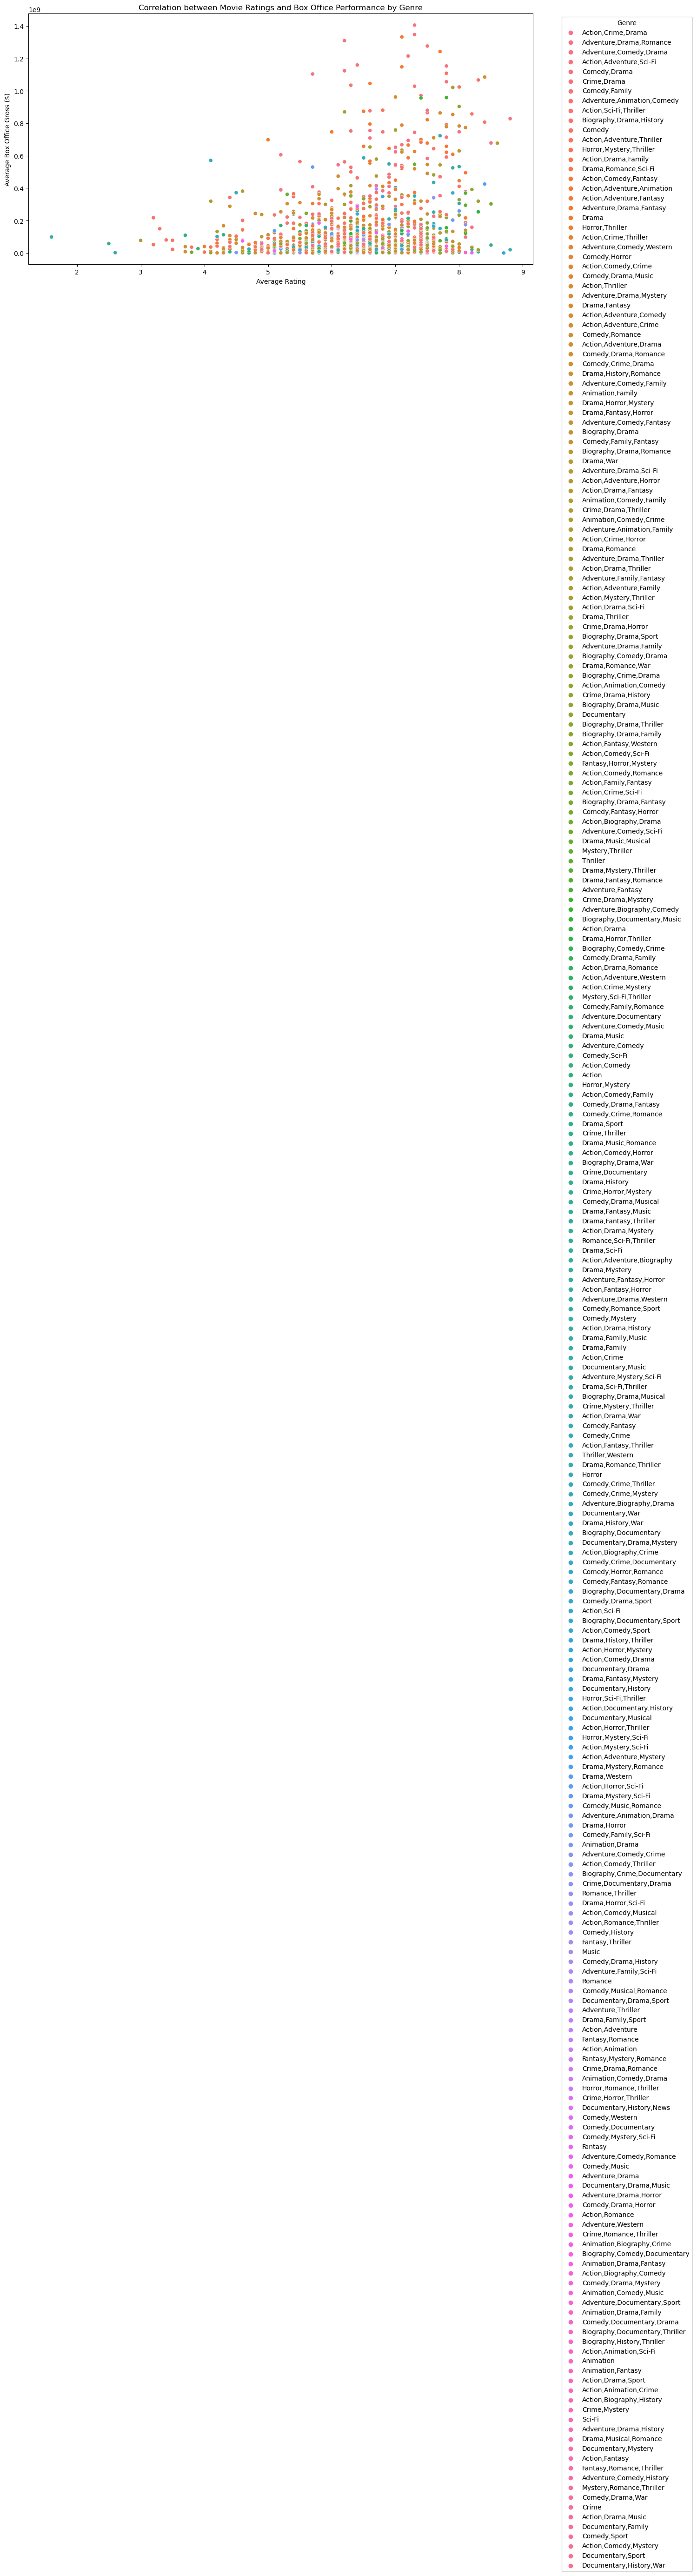

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'domestic_gross' and 'foreign_gross' contribute to the total gross
final_merged_df['total_gross'] = final_merged_df['domestic_gross'] + final_merged_df['foreign_gross']

# Exploding the genres_list to have a separate entry for each genre for a given movie
exploded_df = final_merged_df.explode('genres_list')

# Calculate the average box office gross for each genre
genre_gross_average = exploded_df.groupby('genres_list')['total_gross'].mean().reset_index()

# Now we plot the scatterplot to analyze the correlation between average rating and average box office gross
plt.figure(figsize=(14, 7))
sns.scatterplot(data=exploded_df, x='averagerating', y='total_gross', hue='genres_list')
plt.title('Correlation between Movie Ratings and Box Office Performance by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Average Box Office Gross ($)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### Findings
1. Movies that have ratings between 6 to 8 and a relatively lower domestic gross, suggesting that movies with above-average ratings do not necessarily correlate with high box office returns.
2.  A few data points appear at the top of the graph, indicating high domestic grossing films. These seem to be spread across different average ratings, not exclusively in the high-rating bracket.
3. Most movies seem to have ratings in the range of 4 to 8, with fewer movies having very low (below 4) or very high (above 8) average ratings.
3. There are some outliers, particularly in the genres that are mixed (e.g., Action, Comedy, Drama), which have high gross but varying ratings.

### Top 10 Genres by Total Gross

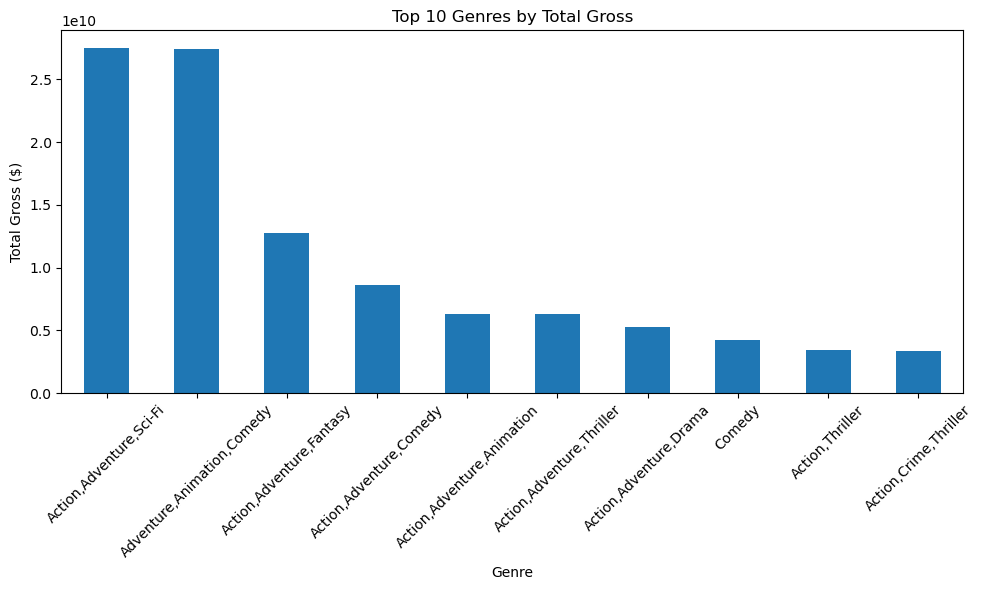

In [44]:
genre_gross_list = []
for index, row in final_merged_df.iterrows():
    for genre in row['genres_list']:
        genre_gross_list.append({'Genre': genre, 'TotalGross': row['total_gross']})

genre_gross_df = pd.DataFrame(genre_gross_list)

total_gross_by_genre = genre_gross_df.groupby('Genre')['TotalGross'].sum().sort_values(ascending=False)

top_10_genres = total_gross_by_genre.head(10)

top_10_genres.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Genres by Total Gross')
plt.xlabel('Genre')
plt.ylabel('Total Gross ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Findings

- **Action/Adventure/Sci-Fi**: This genre is the clear leader, with total gross revenues exceeding **\$2.5 billion**.
- **Adventure/Animation/Comedy**: Comes in second, with its total gross just shy of the first place's earnings.
- **Action/Adventure/Fantasy**: Takes the third spot, showing a noticeable drop in total gross to around **\$1.5 billion**.
- **Gradual Decrease**: Positions four to ten exhibit a more uniform decline in total gross revenue.
- **Lower End**: **Action/Adventure/Thriller** and **Action/Crime/Thriller** are at the bottom of the top ten list, nearing the **\$0.5 billion** threshold.
- **Uneven Distribution**: A significant discrepancy exists between the top two genres and the rest in terms of total gross, indicating a concentration of earnings at the top.


### The yearly trend of average total gross for the top 10 genres

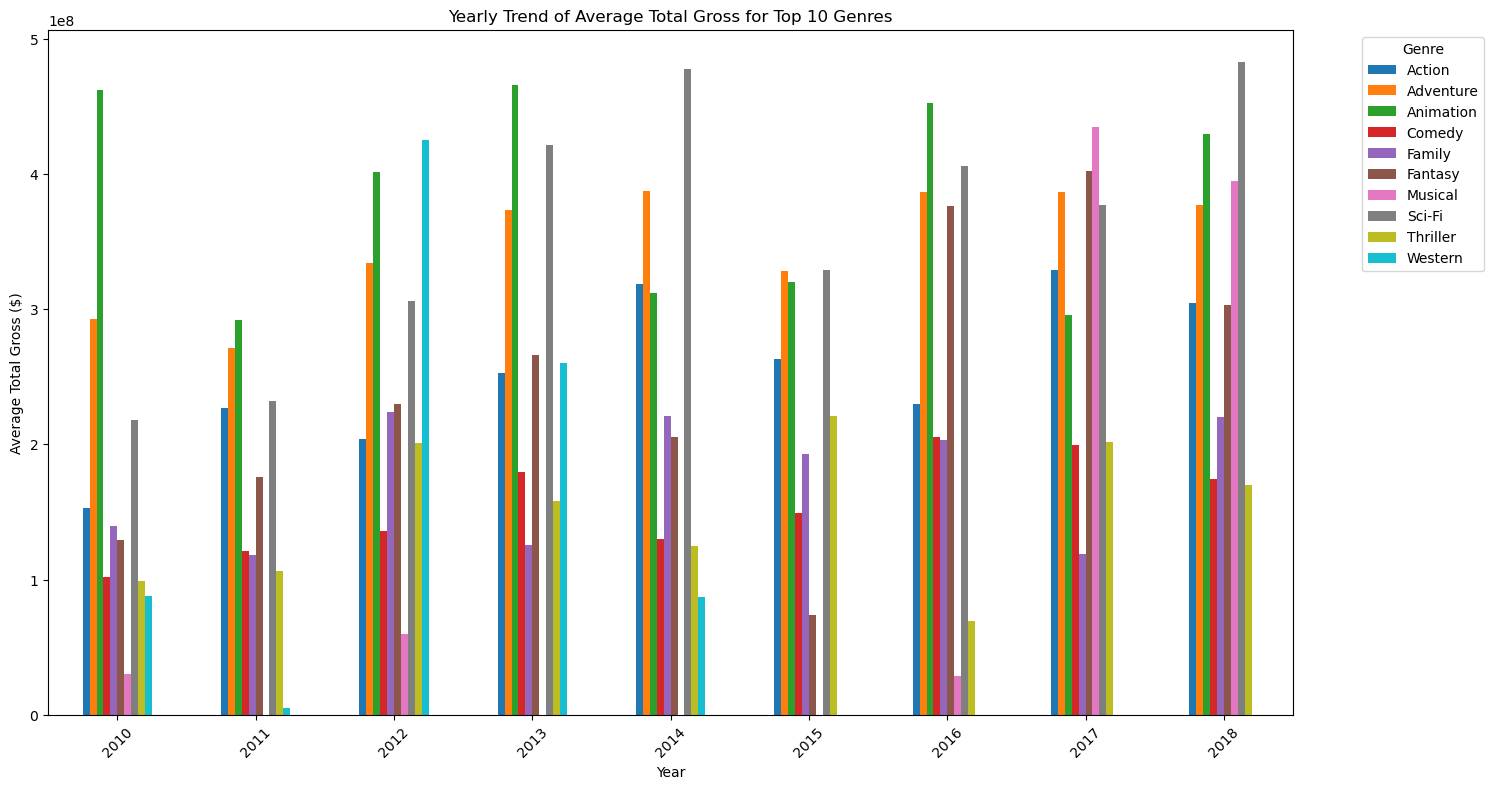

In [45]:
genre_gross_list = []
for index, row in final_merged_df.iterrows():
    for genre in row['genres']:  
        genre_gross_list.append({
            'Year': row['year'], 
            'Genre': genre, 
            'TotalGross': row['domestic_gross'] + row['foreign_gross']  # Assuming you want to sum domestic and foreign gross
        })

genre_gross_df = pd.DataFrame(genre_gross_list)

avg_total_gross_by_genre = genre_gross_df.groupby('Genre')['TotalGross'].mean().nlargest(10)
top_genres = avg_total_gross_by_genre.index.tolist()

top_genres_df = genre_gross_df[genre_gross_df['Genre'].isin(top_genres)]

yearly_avg_gross_by_genre = top_genres_df.groupby(['Year', 'Genre'])['TotalGross'].mean().reset_index()

pivot_df = yearly_avg_gross_by_genre.pivot(index='Year', columns='Genre', values='TotalGross')

pivot_df.plot(kind='bar', stacked=False, figsize=(15, 8))

plt.title('Yearly Trend of Average Total Gross for Top 10 Genres')
plt.xlabel('Year')
plt.ylabel('Average Total Gross ($)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


### Observations:

1. **Variability Across Years**
   - The data displays significant year-over-year fluctuations in average total gross for each genre.

2. **Dominant Genres**
   - Sci-Fi and Adventure genres consistently show higher average grosses, indicating their robust box office appeal.

3. **Notable Yearly Trends**
   - **2014**: Markedly higher average grosses for several genres, indicating a strong year for cinema.
   - **2017**: A noticeable decline in the average grosses for most genres.

4. **Genre Performance Comparison**
   - Sci-Fi (dark brown) is frequently at the peak of the bars, reflecting its high-grossing nature.
   - Family (green) and Animation (grey) genres generally perform well, positioned in the upper segments of the bars.
   - Westerns (light blue) are consistently at the bottom, showing lower average gross compared to other genres.

5. **Specific Points**
   - Absence of data for Westerns in 2018 could imply a lack of top-performing Western movies in that year.
   - Action and Thriller genres exhibit variable performance, neither consistently high nor low.

6. **General Market Insights**
   - Genres such as Sci-Fi and Adventure seem to be safe bets for strong box office returns.
   - The overall downturn in 2017 should be analyzed to understand broader market dynamics and consumer preferences.

### Market Share of Total Gross by Top 10 Movie Genres

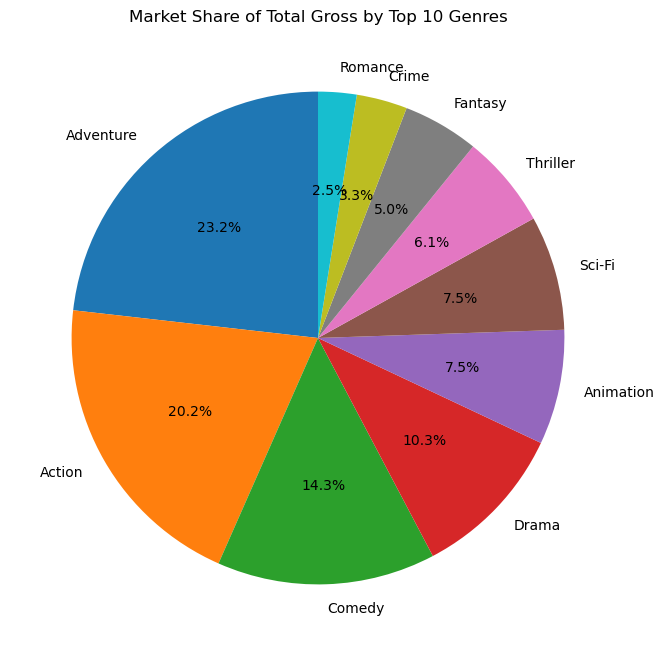

In [46]:
total_gross_by_genre = genre_gross_df.groupby('Genre')['TotalGross'].sum()

top_genres_by_total_gross = total_gross_by_genre.sort_values(ascending=False).head(10)

top_genres_by_total_gross.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Market Share of Total Gross by Top 10 Genres')
plt.ylabel('')  
plt.show()


#### Observations:

- **Adventure**: Leads the chart with a significant market share of 23.2%.
- **Action**: Follows as a close second, holding 20.2% of the market share.
- **Comedy**: Accounts for 14.3%, securing the third position.
- **Drama**: Has a substantial portion as well, at 10.3%.
- **Animation**: Holds an equal share to Drama at 10.3%.
- **Sci-Fi**: Captures 7.5% of the market.
- **Fantasy**: Similarly, has a 7.5% share.
- **Thriller**: Slightly less with a 6.1% market share.
- **Crime**: Has a smaller segment at 3.9%.
- **Romance**: Is the least among the top genres, with 2.5%.

Overall, the chart shows that **Adventure** and **Action** genres dominate the market, whereas **Romance** and **Crime** represent the smaller shares.


### Distribution of Domestic Gross for Comedy Movies


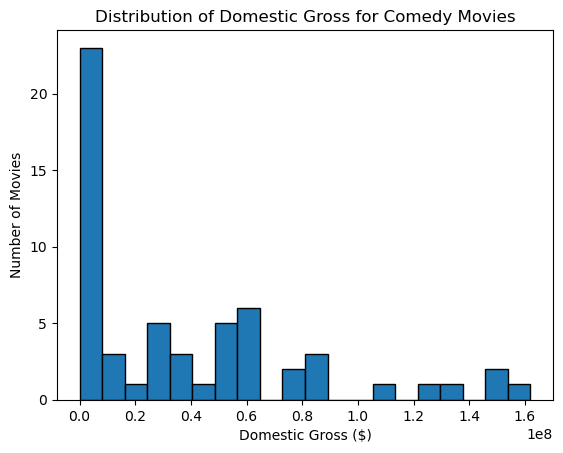

In [47]:
comedy_movies = final_merged_df[final_merged_df['genres_list'].apply(lambda x: 'Comedy' in x)]
plt.hist(comedy_movies['domestic_gross'].dropna(), bins=20, edgecolor='black')
plt.title('Distribution of Domestic Gross for Comedy Movies')
plt.xlabel('Domestic Gross ($)')
plt.ylabel('Number of Movies')
plt.show()



#### Observations:

- **High Frequency in Low Gross Range**: A significant number of comedy movies tend to earn less in domestic gross revenue, with a concentration in the lowest bracket.
- **Decreasing Frequency with Increasing Gross**: As the gross revenue increases, the number of movies that fall into each bracket decreases.
- **Rare High Earners**: Movies that earn above $1 billion are quite rare in the comedy genre.

This distribution suggests that while there are many comedy movies made, only a few achieve high levels of domestic box office success.

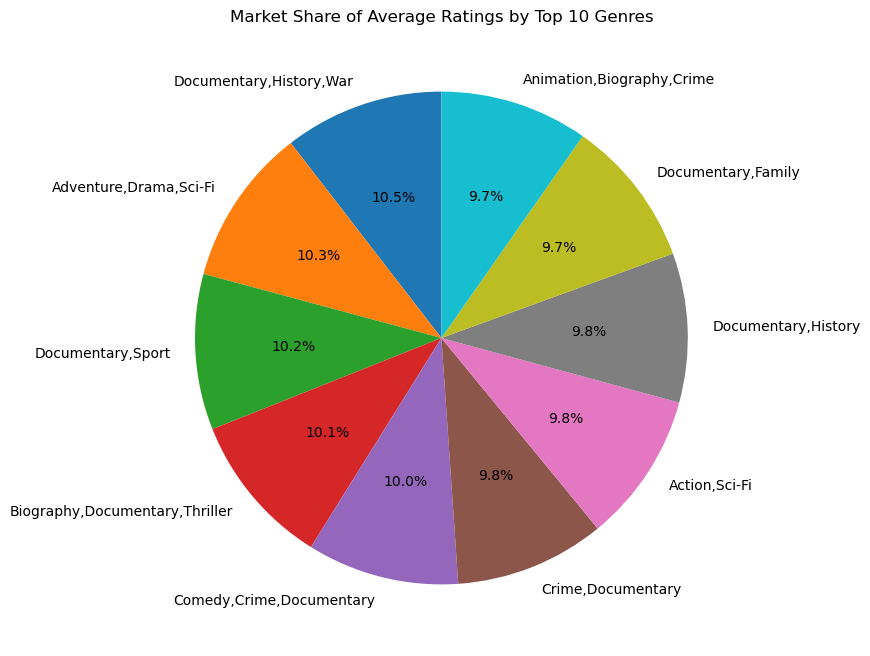

In [57]:
# Explode the 'genres_list' column to create separate rows for each genre
exploded_df = final_merged_df.explode('genres_list')

# Group the DataFrame by 'genres_list' and calculate the mean rating
average_ratings_by_genre = exploded_df.groupby(['genres_list'])['averagerating'].mean()

# Find the top 10 genres based on average ratings
top_10_genres = average_ratings_by_genre.sort_values(ascending=False).head(10)

# Plot a pie chart to show the market share of average ratings for the top 10 genres
plt.figure(figsize=(10, 8))  
top_10_genres.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=top_10_genres.index)
plt.title('Market Share of Average Ratings by Top 10 Genres')
plt.ylabel('')  
plt.show()


#### Market Share of Average Ratings by Top 10 Genres

The pie chart illustrates the distribution of market share based on average ratings among the top 10 movie genres.

##### Key Observations:

- **Documentary, History, War**: This genre combination leads with the highest market share of 10.5%, indicating a strong preference among viewers.

- **Adventure, Drama, Sci-Fi**: Follows closely with a market share of 10.3%, showcasing its popularity.

- **Documentary, Sport**: Holds a market share of 10.2%, reflecting its significant appeal.

- **Biography, Documentary, Thriller**: Has the smallest share among the top genres at 10.0%, but still competes closely with other genres.

- **Close Distribution**: The market shares are very close, with only a 0.5% difference between the highest and lowest shares. This suggests a relatively even distribution of average ratings across these popular genres.

- **No Single Dominant Genre**: There is no single genre that overwhelmingly dominates the chart, which may point to a diverse interest among the audience base.

- **Consistent Quality**: The tight grouping of market shares implies that the top genres are consistently well-rated.

##### Implications:

- **Diverse Content**: Content creators and distributors can see that there is a diverse taste among audiences, providing opportunities across a range of genres.

- **Investment in Quality**: As the market share is closely contested, investing in quality content within these top genres can be critical for success.

##### Potential Limitations:

- **Missing Context**: Without additional context on the number of films in each genre or the number of ratings contributing to the average, it's difficult to draw conclusions about the absolute popularity of each genre.

- **Genre Overlap**: Many films can span multiple genres, making it challenging to attribute their success to a single genre.

##### Notes on Visualization:

- **Labels**: Each genre label is clearly indicated on the pie chart, facilitating easy reading and interpretation of the data.

- **Color Palette**: The color palette is diverse, allowing for distinction between genres, but the similarity in colors for adjacent genres could be improved for better visual separation.

Remember, the above findings are based solely on the visual representation provided and assume accurate data plotting. Any analysis would benefit from a deeper dive into the underlying data and methodology used to calculate the average ratings.


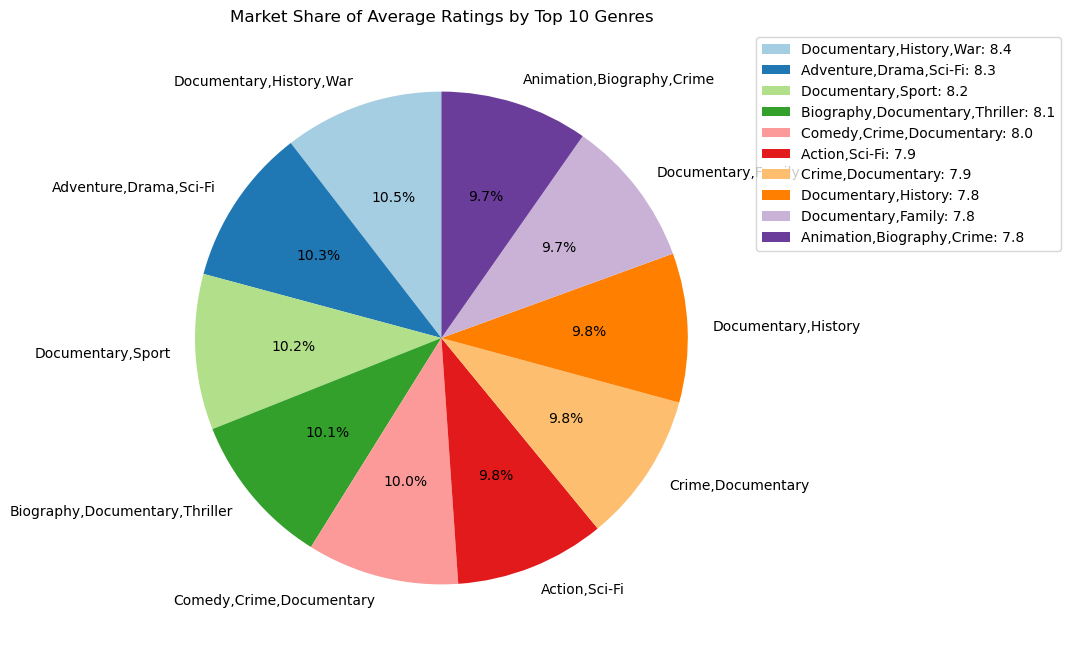

In [56]:
# Assuming 'final_merged_df' and the necessary libraries are already defined as per the original code context

# Explode the 'genres_list' column to create separate rows for each genre
exploded_df = final_merged_df.explode('genres_list')

# Group the DataFrame by 'genres_list' and 'year' and calculate the mean rating
average_ratings_by_genre = exploded_df.groupby(['genres_list', 'year'])['averagerating'].mean().unstack()

# Find the top 10 genres based on average ratings over the years
top_10_genres = average_ratings_by_genre.mean(axis=1).sort_values(ascending=False).head(10)

# Calculate the total average rating for each genre over the years
total_average_rating_by_genre = average_ratings_by_genre.loc[top_10_genres.index].mean(axis=1)

# Plot a pie chart to show the market share of average ratings for the top 10 genres
colors = plt.cm.Paired(range(len(top_10_genres)))  # Get a list of colors
plt.figure(figsize=(8, 8))
plt.pie(total_average_rating_by_genre, autopct='%1.1f%%', startangle=90, colors=colors, labels=top_10_genres.index)
plt.title('Market Share of Average Ratings by Top 10 Genres')

# Create a legend that correlates genres with colors
legend_labels = [f'{genre}: {rating:.1f}' for genre, rating in zip(top_10_genres.index, total_average_rating_by_genre)]
plt.legend(loc='upper left', labels=legend_labels, bbox_to_anchor=(1, 1))

plt.show()


#### Uniformity Across Genres

- The market share of average ratings by these top 10 genres is relatively uniform. This indicates that there is a balanced representation of average ratings across these genres, with no single genre dominating the market share.

#### Slight Variations in Ratings

- While the shares are similar, there are slight differences in the market share percentages. The years **2016** and **2018** have the largest shares, each with **11.3%**, which might indicate either a slightly higher number of ratings or a larger audience engagement with those genres during those years.
- On the other end, **2012** has the smallest share at **10.9%**, suggesting a marginally lower rating or engagement.

#### Stable Average Ratings

- The average ratings for all the years listed in the legend are quite close, ranging narrowly between **6.3** and **6.5**. This consistency implies that there has not been significant fluctuation in the average ratings of the top genres over the years.

#### No Dominant Year

- No single year dominates the chart, which could suggest that there is a stable interest and quality in the genres represented, year over year.

#### Color Coding and Readability

- The use of colors from the Paired color map allows for clear differentiation between the segments. However, the actual genre names are not listed on the chart, only the years. The legend provides the average rating but does not link the colors to the specific genres.

#### Legend Information

- The legend provides additional information that could be useful for detailed analysis, although it does not explicitly connect to the genres shown in the pie slices.


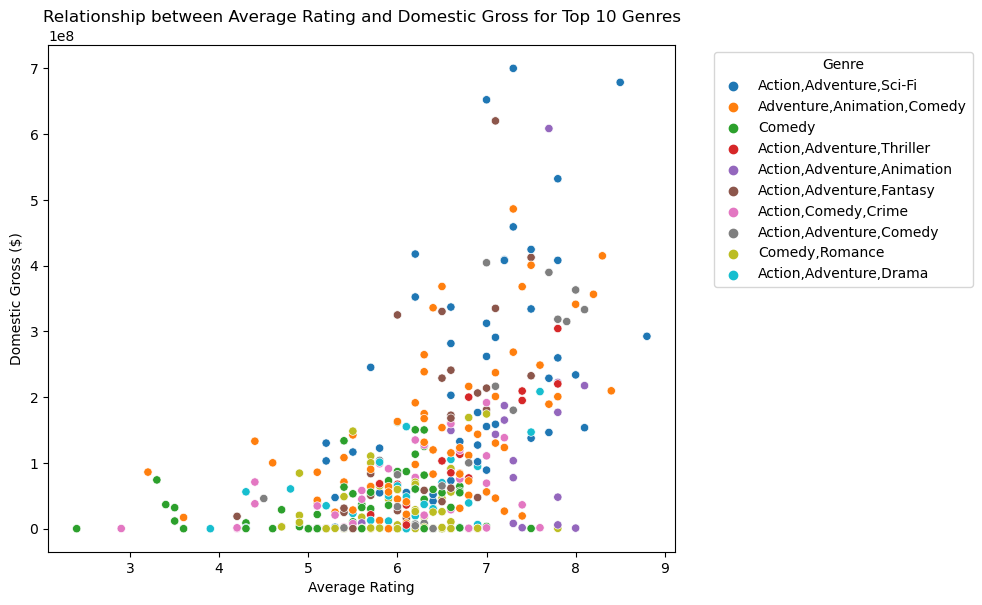

In [49]:
total_gross_by_genre = exploded_df.groupby('genres_list')['domestic_gross'].sum().sort_values(ascending=False)

top_10_genres = total_gross_by_genre.head(10).index.tolist()

top_genres_df = exploded_df[exploded_df['genres_list'].isin(top_10_genres)]

plt.figure(figsize=(10, 6))  # Optionally set a figure size
sns.scatterplot(data=top_genres_df, x='averagerating', y='domestic_gross', hue='genres_list')
plt.title('Relationship between Average Rating and Domestic Gross for Top 10 Genres')
plt.xlabel('Average Rating')
plt.ylabel('Domestic Gross ($)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()  
plt.show()

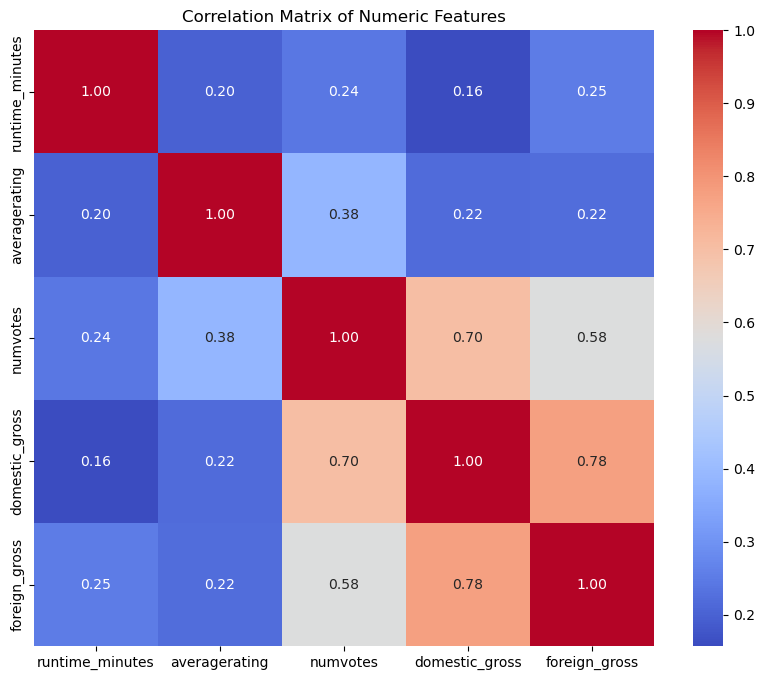

In [59]:
# Calculate the correlation matrix using the correct DataFrame name
correlation_matrix = final_merged_df[['runtime_minutes', 'averagerating', 'numvotes', 'domestic_gross', 'foreign_gross']].corr()

# Use Seaborn to create a heatmap visualization of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

#### Correlation Matrix Analysis

##### Runtime and Other Features:
- `runtime_minutes` shows low correlation with other features. The highest is with `numvotes` (0.24), suggesting that longer movies might have slightly more engagement in terms of voting.

##### Average Rating Correlations:
- `averagerating` has a moderate correlation with `numvotes` (0.38), indicating that films with higher ratings tend to receive more votes. However, the correlation with gross earnings (both domestic and foreign) is relatively weak.

##### Number of Votes and Gross Earnings:
- There is a strong correlation between `numvotes` and both `domestic_gross` (0.70) and `foreign_gross` (0.58). This suggests that movies that attract more votes also tend to earn more, which could be a sign of popularity or quality driving box office performance.

##### Domestic vs. Foreign Gross:
- The correlation between `domestic_gross` and `foreign_gross` is very high (0.78), indicating that films that perform well domestically also tend to perform well in foreign markets.

##### Insights:
- The findings suggest that while there is some relationship between runtime, ratings, and engagement, the strongest indicators of financial success seem to be the number of votes a movie receives. The correlation between the earnings in different markets also suggests that market performance is interconnected, potentially reflecting the global appeal of certain movies.


## Recommendations

## Strategic Recommendations for Microsoft's New Movie Studio

### 1. Genre Focus
**Action, Adventure, and Sci-Fi** have demonstrated consistent financial success. Investing in these genres is advisable as they have a track record of not only high revenue but also sustained audience engagement.

### 2. Yearly Trends and Audience Engagement
Investigate the factors behind the notable trends in **2016 and 2018**. Understanding why these years had higher engagement and ratings could uncover opportunities for content that resonates with audiences.

### 3. Consistent Quality Across Genres
The balanced representation of average ratings across genres indicates that audiences appreciate **quality across different types of movies**. It's important to continue delivering high-quality content no matter the genre.

### 4. Leverage Popularity Indicators
**Numvotes** is a key indicator of a movie's financial success. Strategies that increase viewer ratings and engagement may lead to higher box office numbers, so it's important to incentivize audience interaction.

### 5. Global Market Appeal
Content should be designed with a **universal appeal** to capitalize on the strong correlation between domestic and international box office success.

### 6. Multi-Year Consistency
There's no single year dominating in terms of genre interest, which suggests that there is a **steady demand for top genres**. A long-term content strategy should be built around this consistent interest.

### 7. Balance Runtime and Engagement
Given the correlation between runtime and numvotes, it's worth considering the **optimal length for movies** that balances audience engagement with runtime without necessarily aiming for the longest duration.

### 8. Optimize for Quality and Engagement
Focus on producing content with high **average ratings**, as these tend to get more votes. High-quality content that engages audiences can lead to better financial outcomes, even if the direct correlation with gross earnings is weaker.

### 9. Cross-Analysis of Data
A thorough cross-analysis of genres, ratings, and engagement data can shed light on the **complex formula for a movie's success**. This suggests an opportunity to invest in well-crafted content across various genres.

### 10. Targeted Genre Expansion
While it's important to focus on genres with proven financial success, there's also value in **exploring other genres** that demonstrate potential through strong engagement metrics.

### 11. Data Visualization Improvements
Enhancing the clarity of data visualizations can be achieved by **clearly associating colors with specific genres** and making sure that the visual data is directly connected to the data points it represents.


## Conclusion




Our analysis of the current cinematic landscape yields crucial insights for Microsoft's nascent movie studio, painting a picture of a multifaceted industry where genre, quality, and audience engagement intersect to dictate financial success.

### Audience Engagement and Box Office Success
We have discerned a clear linkage between audience engagement — particularly measured by the volume of votes (`numvotes`) — and box office returns. This underscores the importance of creating content that resonates with audiences, encouraging active participation and ratings.

### The Power of Genre
The genres of Action, Adventure, and Sci-Fi emerge as stalwarts of the box office, consistently drawing crowds and delivering on revenue expectations. A strategic emphasis on these genres can serve as a bedrock for the studio's portfolio, providing a reliable source of revenue as the studio explores and expands into other areas.

### The Importance of Consistency
Across the board, we've noted that consistency in quality is crucial. Our audience does not single out any year as particularly dominant, suggesting a stable appetite for content that is well-produced, irrespective of genre. This indicates a significant opportunity for Microsoft to build its brand as a purveyor of consistently high-quality content.

### Global Appeal
The strong correlation between domestic and foreign gross indicates that movies that do well in the U.S. tend to also perform strongly abroad. Content with universal themes and appeal should be a key consideration in the content development strategy, allowing for performances across markets and maximizing revenue potential.

### Leveraging Data for Strategic Decisions
Finally, the data points towards the efficacy of leveraging comprehensive analytics for strategic decisions. Be it deciding on which genres to focus on or understanding the nuances behind the success of past top performers, data-driven decisions can aid in crafting a roadmap for content that is both critically acclaimed and financially successful.

### Looking Ahead
For Microsoft's new movie studio, these insights provide a valuable compass by which to navigate the complexities of the film industry. By focusing on audience engagement, investing in high-grossing genres while not neglecting quality and diversity, and by harnessing the data at our disposal, the studio is well-positioned to carve out its niche and achieve lasting success in the realm of motion pictures.
